<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week13/blob/main/Recognize_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import library

In [19]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import randint

#2.Import file and handling data

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/AI/W13/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/AI/W13/train/validation',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 180 images belonging to 9 classes.
Found 180 images belonging to 9 classes.


In [22]:
#tags on the training set data
training_set.class_indices

{'01k': 0,
 '02k': 1,
 '05k': 2,
 '100k': 3,
 '10k': 4,
 '200k': 5,
 '20k': 6,
 '500k': 7,
 '50k': 8}

#3.Cteate model

In [23]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 64)      

#4.Training

In [26]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=Adam(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 15, batch_size = 128,  validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
5/5 [==============================] - 11s 2s/step - loss: 0.5491 - accuracy: 0.8556 - val_loss: 1.1273 - val_accuracy: 0.7167
Epoch 2/15
5/5 [==============================] - 9s 2s/step - loss: 0.2691 - accuracy: 0.9500 - val_loss: 2.7845 - val_accuracy: 0.5556
Epoch 3/15
5/5 [==============================] - 9s 2s/step - loss: 0.6091 - accuracy: 0.8722 - val_loss: 1.6833 - val_accuracy: 0.7056
Epoch 4/15
5/5 [==============================] - 9s 2s/step - loss: 0.1256 - accuracy: 0.9556 - val_loss: 1.4412 - val_accuracy: 0.7222
Epoch 5/15
5/5 [==============================] - 11s 2s/step - loss: 0.0262 - accuracy: 0.9944 - val_loss: 1.9084 - val_accuracy: 0.7278
Epoch 6/15
5/5 [==============================] - 10s 2s/step - loss: 0.0470 - accuracy: 0.9833 - val_loss: 2.0356 - val_accuracy: 0.6889
Epoch 7/15
5/5 [==============================] - 9s 2s/step - loss: 0.2304 - accuracy: 0.9667 - val_loss: 1.5995 - val_accuracy: 0.7500
Epoch 8/15
5/5 [======================

In [27]:
#save model
model.save('Detect_money_cnn.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


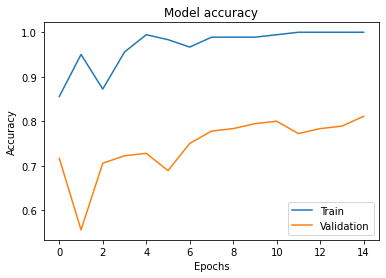

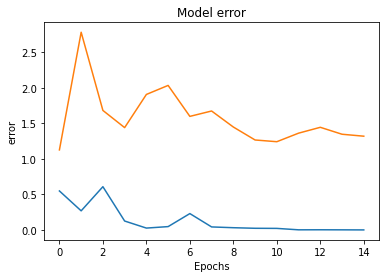

In [28]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

#5.Predict

In [29]:
CNN_money =load_model('Detect_money_cnn.h5')

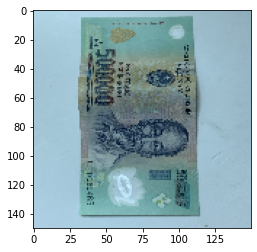

In [41]:
img_path = '/content/drive/MyDrive/AI/W13/test/500k/500k (8).jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
money=np.argmax(CNN_money.predict(img),axis=1)
pred = model.predict(img)
classes = ['01k','02k','05k','10k','20k','50k','100k','200k','500k']

In [42]:
print(np.argmax(pred))
if money==0: print("Menh gia la:",classes[0])
elif money==1: print("Menh gia la:",classes[1])
elif money==2: print("Menh gia la:",classes[2])
elif money==3: print("Menh gia la:",classes[6])
elif money==4: print("Menh gia la:",classes[3])
elif money==5: print("Menh gia la:",classes[7])
elif money==6: print("Menh gia la:",classes[4])
elif money==7: print("Menh gia la:",classes[8])
elif money==8: print("Menh gia la:",classes[5])

7
Menh gia la: 500k


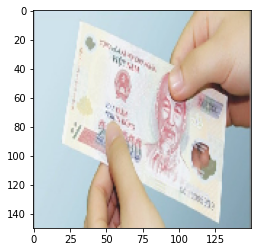

In [43]:
img_path ='200k.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
money=np.argmax(CNN_money.predict(img),axis=1)
pred = model.predict(img)
classes = ['01k','02k','05k','10k','20k','50k','100k','200k','500k']

In [44]:
print(np.argmax(pred))
if money==0: print("Menh gia la:",classes[0])
elif money==1: print("Menh gia la:",classes[1])
elif money==2: print("Menh gia la:",classes[2])
elif money==3: print("Menh gia la:",classes[6])
elif money==4: print("Menh gia la:",classes[3])
elif money==5: print("Menh gia la:",classes[7])
elif money==6: print("Menh gia la:",classes[4])
elif money==7: print("Menh gia la:",classes[8])
elif money==8: print("Menh gia la:",classes[5])

5
Menh gia la: 200k
